<a href="https://colab.research.google.com/github/fbalsrud/ITB2022/blob/main/%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**주제: 혈청크레아티닌 수치 정상/비정상 분류**

 * 가입자일련번호 : 해당 가입자에 부여한 일련번호
 * 혈청크레아티닌 정상/비정상 : 타겟 변수 (2개의 class)
    * 0 (정상)
    * 1 (비정상)


In [ ]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mglearn

## 데이터 불러오기 및 탐색

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
health = pd.read_csv('https://raw.githubusercontent.com/fbalsrud/ITB2022/main/health_data.csv', index_col = '가입자일련번호')

print(health.columns)

Index(['기준년도', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')


In [ ]:
display(health.info())
display(health.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   시도코드         10000 non-null  int64  
 2   성별코드         10000 non-null  object 
 3   연령대코드(5세단위)  10000 non-null  int64  
 4   신장(5Cm단위)    10000 non-null  int64  
 5   체중(5Kg 단위)   10000 non-null  int64  
 6   허리둘레         10000 non-null  float64
 7   시력(좌)        10000 non-null  float64
 8   시력(우)        10000 non-null  float64
 9   청력(좌)        10000 non-null  int64  
 10  청력(우)        10000 non-null  int64  
 11  수축기혈압        9912 non-null   float64
 12  이완기혈압        9912 non-null   float64
 13  식전혈당(공복혈당)   9912 non-null   float64
 14  총콜레스테롤       4044 non-null   float64
 15  트리글리세라이드     4044 non-null   float64
 16  HDL콜레스테롤     4044 non-null   float64
 17  LDL콜레스테롤     3977 non-null   float64
 18  혈색소          9912 non-null   float64
 19  요단백 

None

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,165,60,72.1,1.2,1.5,1,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
2,2020,27,F,13,150,65,81.0,0.8,0.8,1,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
3,2020,11,F,12,155,55,70.0,0.6,0.7,1,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,31,M,13,160,70,90.8,1.0,1.0,1,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,41,F,12,155,50,75.2,1.5,1.2,1,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


### 변수명 변경



In [ ]:
#변수명 변경
health = health.rename(columns={"가입자일련번호": "id"})

health = health.rename(columns={"기준년도": "HCHK_YEAR"})
health = health.rename(columns={"시도코드": "SIDO"})
health = health.rename(columns={"성별코드": "SEX"})
health = health.rename(columns={"연령대코드(5세단위)": "AGE_GROUP"})
health = health.rename(columns={"신장(5Cm단위)": "HEIGHT"})
health = health.rename(columns={"체중(5Kg 단위)": "WEIGHT"})
health = health.rename(columns={"허리둘레": "WAIST"})
health = health.rename(columns={"시력(좌)": "SIGHT_LEFT"})
health = health.rename(columns={"시력(우)": "SIGHT_RIGHT"})
health = health.rename(columns={"청력(좌)": "HEAR_LEFT"})
health = health.rename(columns={"청력(우)": "HEAR_RIGHT"})
health = health.rename(columns={"수축기혈압": "BP_HIGH"})
health = health.rename(columns={"이완기혈압": "BP_LWST"})
health = health.rename(columns={"식전혈당(공복혈당)": "BLDS"})
health = health.rename(columns={"총콜레스테롤": "TOT_CHOLE"})
health = health.rename(columns={"트리글리세라이드": "TRIGLYCERIDE"})
health = health.rename(columns={"HDL콜레스테롤": "HDL_CHOLE"})
health = health.rename(columns={"LDL콜레스테롤": "LDL_CHOLE"})
health = health.rename(columns={"혈색소": "HMG"})
health = health.rename(columns={"요단백": "OLIG_PROTE_CD"})
health = health.rename(columns={"혈청크레아티닌": "CREATININE"})
health = health.rename(columns={"(혈청지오티)AST": "SGOT_AST"})
health = health.rename(columns={"(혈청지오티)ALT": "SGPT_ALT"})
health = health.rename(columns={"감마지티피": "GAMMA_GTP"})
health = health.rename(columns={"흡연상태": "SMK"})
health = health.rename(columns={"음주여부": "DRK"})
health = health.rename(columns={"구강검진수검여부": "INSPEC"})
health = health.rename(columns={"치아우식증유무": "CRS_YN"})
health = health.rename(columns={"치석": "TTR_YN"})
health = health.rename(columns={"데이터공개일자": "DATA_STD"})

In [ ]:
#바뀐 변수명 확인
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HCHK_YEAR      10000 non-null  int64  
 1   SIDO           10000 non-null  int64  
 2   SEX            10000 non-null  object 
 3   AGE_GROUP      10000 non-null  int64  
 4   HEIGHT         10000 non-null  int64  
 5   WEIGHT         10000 non-null  int64  
 6   WAIST          10000 non-null  float64
 7   SIGHT_LEFT     10000 non-null  float64
 8   SIGHT_RIGHT    10000 non-null  float64
 9   HEAR_LEFT      10000 non-null  int64  
 10  HEAR_RIGHT     10000 non-null  int64  
 11  BP_HIGH        9912 non-null   float64
 12  BP_LWST        9912 non-null   float64
 13  BLDS           9912 non-null   float64
 14  TOT_CHOLE      4044 non-null   float64
 15  TRIGLYCERIDE   4044 non-null   float64
 16  HDL_CHOLE      4044 non-null   float64
 17  LDL_CHOLE      3977 non-null   float64
 18  HMG   

###데이터 전처리

In [ ]:
#결측치 제거
health = health.drop(['TOT_CHOLE','TRIGLYCERIDE','HDL_CHOLE','LDL_CHOLE','CRS_YN','TTR_YN'], axis=1)

#불필요한 변수 제거
health = health.drop(['HCHK_YEAR', 'DATA_STD'], axis=1)

#결측행 제거
health.dropna(inplace=True, axis=0)

health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9858 entries, 1 to 10000
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SIDO           9858 non-null   int64  
 1   SEX            9858 non-null   object 
 2   AGE_GROUP      9858 non-null   int64  
 3   HEIGHT         9858 non-null   int64  
 4   WEIGHT         9858 non-null   int64  
 5   WAIST          9858 non-null   float64
 6   SIGHT_LEFT     9858 non-null   float64
 7   SIGHT_RIGHT    9858 non-null   float64
 8   HEAR_LEFT      9858 non-null   int64  
 9   HEAR_RIGHT     9858 non-null   int64  
 10  BP_HIGH        9858 non-null   float64
 11  BP_LWST        9858 non-null   float64
 12  BLDS           9858 non-null   float64
 13  HMG            9858 non-null   float64
 14  OLIG_PROTE_CD  9858 non-null   float64
 15  CREATININE     9858 non-null   float64
 16  SGOT_AST       9858 non-null   float64
 17  SGPT_ALT       9858 non-null   float64
 18  GAMMA_G

In [ ]:
#object인 변수 척도 바꾸기(성별, 흡연상태, 음주여부)

health = pd.get_dummies(health)
display(health.head())

,SIDO,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,...,SGPT_ALT,GAMMA_GTP,INSPEC,SEX_F,SEX_M,SMK_No,SMK_NotNow,SMK_Yes,DRK_No,DRK_Yes
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,36,9,165,60,72.1,1.2,1.5,1,1,127.0,...,27.0,21.0,0,0,1,1,0,0,1,0
2,27,13,150,65,81.0,0.8,0.8,1,1,110.0,...,15.0,15.0,0,1,0,1,0,0,1,0
3,11,12,155,55,70.0,0.6,0.7,1,1,123.0,...,25.0,7.0,0,1,0,1,0,0,1,0
4,31,13,160,70,90.8,1.0,1.0,1,2,134.0,...,97.0,72.0,1,0,1,1,0,0,1,0
5,41,12,155,50,75.2,1.5,1.2,1,1,144.0,...,17.0,14.0,0,1,0,1,0,0,1,0


### 파생변수 생성

In [ ]:
#혈청크레아티닌 정상치는 0.8~1.7mg/dL

def get_diagnosis(x):   # 혈청크레아티닌 수치가 정상 범위에 속하면 0, 그렇지 않으면 1을 반환하는 함수 정의
  if 0.8 <= x <= 1.7:
    return 0
  else:
    return 1

health['diagnosis'] = health['CREATININE'].apply(get_diagnosis)   # 새로운 column 'diagnosis' 생성
health['diagnosis']

가입자일련번호
1        0
2        1
3        1
4        0
5        1
        ..
9995     0
9996     1
9997     1
9998     0
10000    1
Name: diagnosis, Length: 9858, dtype: int64

### 혈청크레아티닌 정상/비정상 여부 비율 확인

0    6283
1    3575
Name: diagnosis, dtype: int64


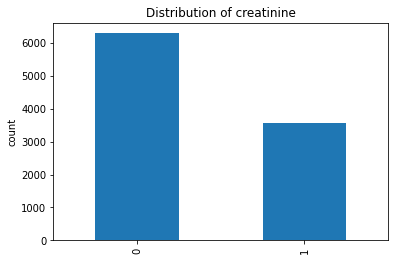

In [ ]:
print(health['diagnosis'].value_counts())

health['diagnosis'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of creatinine')
plt.show()

##의사결정나무 만들기

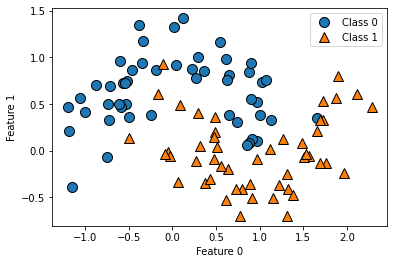

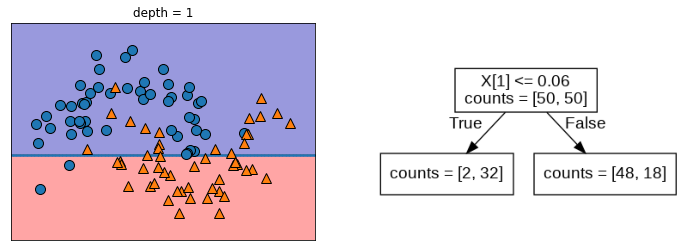

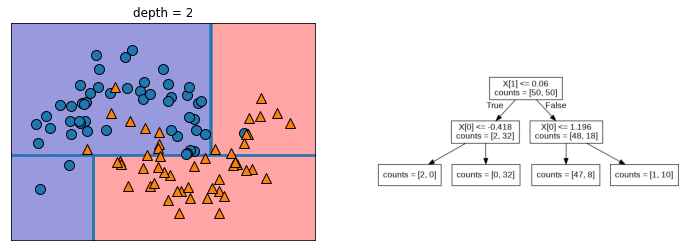

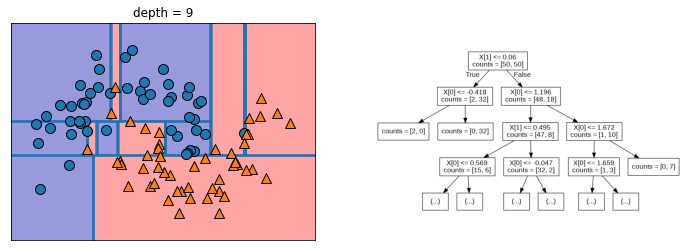

In [ ]:
mglearn.plots.plot_tree_progressive()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health.drop(['diagnosis', 'CREATININE'], axis=1)  # 독립변수
y = health['diagnosis']   # target 변수 diagnosis 

# 데이터셋을 학습(train)과 테스트(test) 세트로 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=77, stratify=y)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.652


In [ ]:
# 의사결정나무의 깊이를 4로 제한했을 때 가장 높은 시험용 데이터 정확도를 보임.
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.765
시험용 데이터 정확도: 0.757


##랜덤포레스트 만들기

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.757


##의사결정나무와 랜덤포레스트 비교

###정확도 비교
- 혈청크레아티닌과 같이 건강 지표는 오분류 했을 때의 비용이 크므로 오분류율을 줄이고 정확도를 높이는 것이 바람직한 분류 목적이다.
- 정확도를 평가방법으로 라인그래프 비교한 결과, 10번의 교차 검증 모두에서 랜덤포레스트의 정확도가 더욱 높다.

In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.63918919 0.66351351 0.63243243 0.63193505 0.64005413 0.70635995
 0.70094723 0.67929635 0.65899865 0.67794317]
Random forest:  [0.74864865 0.76081081 0.75135135 0.71989175 0.76589986 0.77131258
 0.75913396 0.77537212 0.76860622 0.7564276 ]
Accuracy mean
Decision tree :0.663
Random forest :0.758


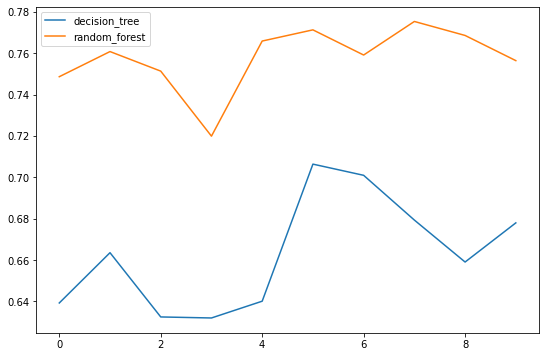

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

##인사이트 도출


###중요 변수 설명
두 개 분류모델 분석을 바탕으로 혈청크레아티닌 수치에는 성별변수가 가장 주요하게 작용함을 확인할 수 있다.

In [ ]:
#의사결정나무
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.00577021 0.01946939 0.         0.         0.         0.
 0.         0.         0.         0.00237439 0.00189323 0.02070891
 0.01149431 0.         0.         0.00293224 0.01095397 0.00588365
 0.91851971 0.         0.         0.         0.         0.
 0.        ]


In [ ]:
#랜덤포레스트
result = forest.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.0420896  0.03670348 0.05768657 0.04043471 0.06347604 0.03751791
 0.03701256 0.00303278 0.00356361 0.05902993 0.05504484 0.06196029
 0.07810572 0.00720235 0.05430027 0.054097   0.06536334 0.01114488
 0.08096643 0.09780357 0.01864115 0.01150377 0.00737791 0.00793218
 0.00800912]
